In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np


In [2]:
x, y = make_classification(n_samples=1000,     # Number of samples
                           n_features=10,      # Number of features (independent variables)
                           n_classes=2,        # Number of output classes (binary classification)
                           n_informative=3,    # Number of informative features
                           n_redundant=2,      # Number of redundant features (linear combinations)
                           random_state=42)    # Seed for reproducibility

In [3]:
x.shape, y.shape

((1000, 10), (1000,))

# Linear Combination

$$\pi = \beta_0 + \beta_1x_1+\ldots+\beta_kx_k$$

โดย
- $\beta_0$ คือ intercept
- Coefficients สำหรับแต่ละ features $x_i$ ถูกแสดงโดย $\beta_i$.



In [6]:
# 1. สุ่มสร้าง beta_i เริ่มต้น
beta_i = np.random.rand(10)

In [7]:
# 2. สุ่มสร้าง beta_0 เริ่มต้น
beta_0 = np.random.rand(1)

In [9]:
# 3. สร้างตัวแปร pi ตามตัวอย่างด้านบน
pi = beta_0 + np.dot(x, beta_i)
pi

array([-1.89800237e+00,  3.05484385e+00, -1.08250524e+00, -1.15782798e+00,
        6.49065130e+00,  3.29556964e+00,  3.74794154e+00,  2.74479314e+00,
        1.47101131e+00,  4.04516305e+00,  1.80151041e+00,  6.11071570e+00,
        1.98155667e+00,  1.95279042e+00, -1.28758045e+00,  1.01878837e-01,
        3.45744620e+00,  2.69038166e+00,  3.77805239e-01,  4.37586579e-01,
       -2.32463207e-01,  2.53162042e+00,  2.69018010e+00,  1.68704702e+00,
        4.22578991e+00,  2.17352049e+00,  3.71008969e+00,  2.89584666e+00,
        3.53512513e+00,  1.47385032e+00, -3.76804783e+00,  2.23242843e+00,
       -1.96101040e+00,  3.37518312e+00,  4.40822131e+00,  1.15110382e+00,
       -2.64162241e+00,  4.25635892e+00,  1.11847155e+00,  1.27652341e+00,
        3.12053896e+00,  4.65395523e+00, -4.93150331e-01,  4.15967475e+00,
        1.78898443e+00,  1.26639014e+00,  4.07054062e+00,  1.09947834e+00,
        1.03282472e+00,  2.81199235e+00,  4.24009280e+00,  1.75535776e+00,
        3.88636609e+00,  

# Sigmoid function
$$Sigmoid(k) = \frac{1}{1+e^{k}}$$

ถ้าเราใส่ $\pi$ เข้าไปยังฟังก์ชั่น Sigmoid จะได้ค่าความน่าจะเป็นออกมา

$$probability = Sigmoid(\pi) = \frac{1}{1+e^{\pi}}$$

In [10]:
# ตัวอย่างโค้ดสำหรับ Sigmoid function

sigmoid = lambda k: 1 / (1+np.exp(-k))

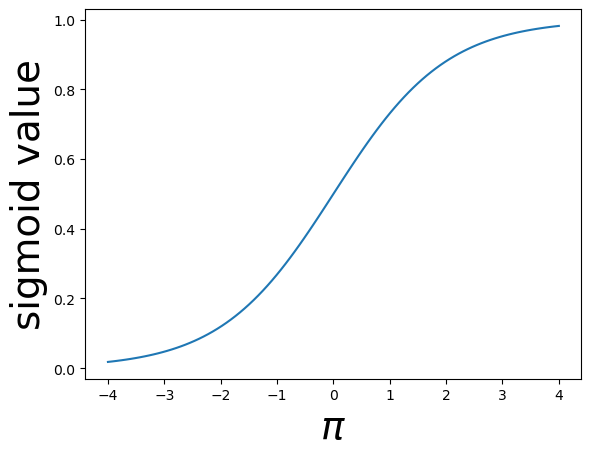

In [11]:
pi = np.linspace(-4, 4, 100)
plt.plot(pi, sigmoid(pi))
plt.xlabel('$\pi$', fontsize=28)
plt.ylabel("sigmoid value", fontsize=28)
plt.savefig("sigmoid.png");

In [13]:
# ทดลอง นำค่า pi ส่งเข้าไปยัง Sigmoid function
np.min(sigmoid(pi))

0.01798620996209156

In [14]:
np.max(sigmoid(pi))

0.9820137900379085

# Cost Function: Cross-Entropy

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$

where:
- $ J(\theta) $ คือ cost function,
- $ m $ คือ จำนวน training examples,
- $ y^{(i)} $ คือ label ของ training example ที่ $ i $th ,
- $ h_\theta(x^{(i)}) $ คือ probability ที่ถูกทำนาย จาก  example ที่ $ i $th
- $ x^{(i)} $ คือ feature vector ที่ $ i $th ของ training example.

# Gradient Decent

New Parameter = Old Parameter − Learning Rate × Gradient

$$\theta_{\text{new}} = \theta_{\text{old}} - \alpha \cdot \nabla J(\theta)$$

- $ \theta_{\text{new}} $ คือ parameter values ที่ได้รับการอัพเดทให้ดีขึ้นจาก parameter values ก่อนหน้า
- $ \theta_{\text{old}} $ คือ parameter values ก่อนหน้า
- $ \alpha $ (alpha) คือ learning rate,
- $ \nabla J(\theta) $ คือ **gradient** ของ **cost function** ซึ่งสอดคล้องกับ parameters $ \theta $.

---

$$\beta_{new} = \beta_{old} - \alpha\times [x^\top\cdot(\hat y - y)] / m$$

$$b_{new} = b_{old} - \alpha\times (\hat y - y) / m$$

In [ ]:
# Training loop
learning_rate = 0.1
num_epochs = 1000
num_samples = y.shape[0]

for epoch in range(num_epochs):
    pi = np.dot(x, beta_i) + beta_0
    y_pred = sigmoid(pi)

    # Compute gradients
    dBeta = np.dot(X.T, (y_pred - y)) / num_samples
    db = np.sum(y_pred - y) / num_samples

    # Update weights and bias
    beta_i = beta_i - learning_rate * dBeta
    beta_0 = beta_0 - learning_rate * db